In [21]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.somlib as som
%matplotlib inline

from sklearn import datasets

In [22]:
def make_3moons():
    xxc, yc = datasets.make_circles(n_samples=400, factor=.5,
                                          noise=.07)
    idx = yc==0
    xxc = xxc[idx]
    yc = yc[idx]

    idx = (xxc[:,0]+xxc[:,1]<1)
    xxc = xxc[idx]
    yc = yc[idx]


    xxm, ym = datasets.make_moons(n_samples=200, noise=.15)
    xxm = xxm/2 - 0.2

    xx = np.concatenate((xxm, xxc), axis=0)
    y = np.concatenate((ym, yc+2), axis=0)

    ## MinMax Normalization
    x1 = xx[:,0]
    x2 = xx[:,1]
    x1 = (x1-x1.min())/(x1.max()-x1.min())
    x2 = (x2-x2.min())/(x2.max()-x2.min())
    xx = np.column_stack((x1,x2))
    return xx, y

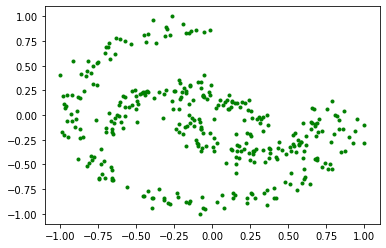

In [33]:
from sklearn.datasets import make_circles
# xy, clas = make_circles(n_samples=400, shuffle=True, noise=0.05, random_state=None, factor=0.9)
xy, clas = make_3moons()
xy = xy*2-1
x = xy[:,0]
y = xy[:,1]
plt.scatter(x, y, marker='.', color='g')

## Continuous Visualization

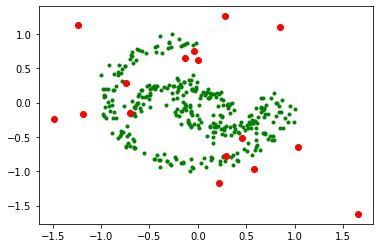

In [34]:
mysom = som.SOM2D(2, (4,4), learning_rate=1, sigma=0.5, decay_rate=0.9999999)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(mysom.weights[0], mysom.weights[1], color='r')

In [35]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

EPOCHS = 5
for epoch in range(EPOCHS):
    print('EPOCHS', epoch)
    print(f'lr={mysom.learning_rate}, sigma={mysom.sigma}')
    sample_indx = np.random.permutation(len(xy))
    for i, indx in enumerate(sample_indx):
        mysom._calculate_vector_distance_(xy[indx])
        mysom._calculate_neighbourhood_influence_()
        mysom._calculate_gradients_()
        mysom._update_()
        
        if i%20 ==0:
            ax.clear()
            plt.scatter(x, y, marker='.', color='g')
            plt.scatter(mysom.weights[0], mysom.weights[1], color='r')
            fig.canvas.draw()
            plt.pause(0.001)
        
    mysom._decay_()
plt.close()

EPOCHS 0
lr=1, sigma=0.5
EPOCHS 1
lr=0.5000000250000012, sigma=0.2500000125000006
EPOCHS 2
lr=0.16666668611111277, sigma=0.08333334305555638
EPOCHS 3
lr=0.04166667465277879, sigma=0.020833337326389395
EPOCHS 4
lr=0.008333335597222605, sigma=0.004166667798611303


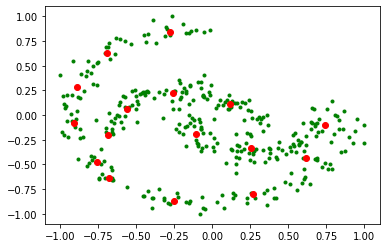

In [36]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(mysom.weights[0], mysom.weights[1], color='r')

In [37]:
mysom.weights.shape

(2, 4, 4)

### visualize cluster

In [38]:
_x = np.linspace(-1.1, 1.1, 100)
_y = np.linspace(-1.1, 1.1, 100)
_x, _y = np.meshgrid(_x,_y)
_x = _x.reshape(-1)
_y = _y.reshape(-1)
_xy = np.stack([_x, _y], axis=1)

In [39]:
x.shape, y.shape, xy.shape

((348,), (348,), (348, 2))

In [40]:
_x.shape, _y.shape, _xy.shape

((10000,), (10000,), (10000, 2))

In [41]:
winners = []
for i in range(len(_xy)):
    dists, winning = mysom._calculate_vector_distance_(_xy[i])
    indx = winning[0]+4*winning[1]
    winners.append(indx)
winners = np.array(winners)

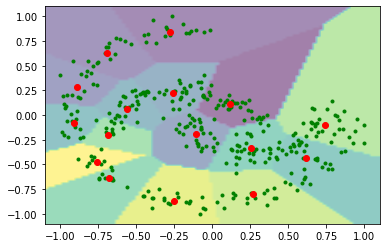

In [42]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(mysom.weights[0], mysom.weights[1], color='r')
plt.imshow(winners.reshape(100, 100),
           interpolation='bilinear',
           extent=(_x.min(), _x.max(), _y.min(), _y.max()),
#            cmap='tab20',#matplotlib.colors.ListedColormap(colors[1:-1]),
           alpha=0.5,
           aspect='auto', origin='lower')

### Equivalence to K-Means

In [43]:
from sklearn.cluster import KMeans

In [44]:
mykmeans = KMeans(n_clusters=4*4)

In [45]:
yout = mykmeans.fit_predict(xy)

In [46]:
_yout = mykmeans.predict(_xy)

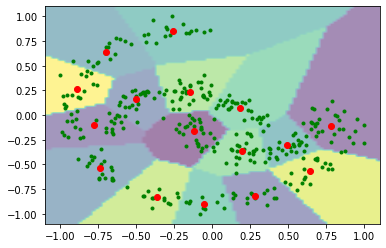

In [47]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(mykmeans.cluster_centers_[:,0], mykmeans.cluster_centers_[:,1], color='r')
plt.imshow(_yout.reshape(100, 100),
           interpolation='bilinear',
           extent=(_x.min(), _x.max(), _y.min(), _y.max()),
#            cmap='tab20',#matplotlib.colors.ListedColormap(colors[1:-1]),
           alpha=0.5,
           aspect='auto', origin='lower')

In [48]:
mykmeans.cluster_centers_.T

array([[-0.11712504,  0.78326383, -0.77545304,  0.28339311, -0.49889548,
        -0.73678736, -0.69633042,  0.49218436, -0.25542673, -0.05561451,
         0.18225991,  0.19240525, -0.14862885, -0.36149632,  0.64408412,
        -0.88798704],
       [-0.16346694, -0.11161849, -0.1014772 , -0.81843726,  0.15796466,
        -0.53172177,  0.63966271, -0.3067979 ,  0.84975445, -0.89769533,
         0.07017058, -0.36020197,  0.22903149, -0.82826133, -0.56439464,
         0.26274542]])